# [k平均法] 英語と数学の試験結果から新入生をクラス分けする
Copyright © 2022 田中裕行 All rights reserved.

## (1) クラス分けするデータを用意する

In [1]:
import random
import pandas as pd

math    = [] # 数学の得点用リスト
english = [] # 英語の得点用リスト

random.seed(0)
for _ in range(30): # 30人分のデータを作成
    math.append(random.randint(0, 100))    # 数学の得点を0～100まで乱数で生成
    english.append(random.randint(0, 100)) # 英語の得点を0～100まで乱数で生成

df = pd.DataFrame({'math':math,'english':english}) # pandasのデータフレームに変換
df

,math,english
0,49,97
1,53,5
2,33,65
3,62,51
4,100,38
5,61,45
6,74,27
7,64,17
8,36,17
9,96,12


## (2) データの内訳を確認する

In [2]:
# データの件数、平均、標準偏差等を一括表示する
df.describe()

,math,english
count,30.000000,30.000000
mean,58.900000,46.833333
std,28.658934,28.185449
min,0.000000,5.000000
25%,41.500000,20.250000
50%,62.500000,43.500000
75%,78.750000,70.000000
max,100.000000,100.000000


## (3) グラフで視覚化する

<function matplotlib.pyplot.show>

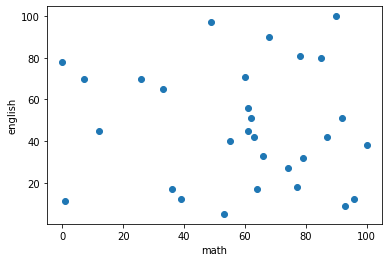

In [3]:
import matplotlib.pyplot as plt

# 数学と英語の得点を散布図で出力
plt.scatter(math, english)
plt.xlabel('math')
plt.ylabel('english')
plt.show

## (4) 機械にクラス分けさせる

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init='random')
cls_data = df.copy()
model.fit(cls_data)

KMeans(n_clusters=3, random_state=0)

## (5) 中心点の座標を確認する

In [5]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:2]
cluster_center

,math,english
0,13.166667,56.500000
1,69.888889,30.388889
2,71.666667,86.500000


## (6) クラス分けした結果をグラフで表示する

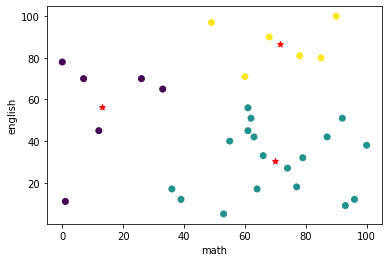

In [6]:
# クラス分けしたデータを散布図で描画
plt.scatter(cls_data['math'], cls_data['english'], c=model.labels_)
plt.xlabel('math')
plt.ylabel('english')

# 中心点を赤い星マークで描画
plt.scatter(cluster_center['math'], cluster_center['english'], marker='*', color='red')

## (7) クラス分けした結果の内訳を表示する

In [7]:
import numpy as np

# クラス分けした結果のリストを出力
result = model.predict(df)
print(result)

# クラス分けした結果の内訳を出力
print('Aクラス：{}名'.format(np.count_nonzero(result == 0)))
print('Bクラス：{}名'.format(np.count_nonzero(result == 1)))
print('Cクラス：{}名'.format(np.count_nonzero(result == 2)))

[2 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 1 2 0 1 1 0 0 1 2 2 0 1]
Aクラス：6名
Bクラス：18名
Cクラス：6名


## (8) クラス分けした結果の詳細を表示する

In [8]:
# 受験生ごとのクラス名を表示する
cls = {0:'A', 1:'B', 2:'C'}
test_no = 1
for r in result:
  print('受験番号:{:03d} -> {}クラス'.format(test_no, cls.get(r)))
  test_no += 1

受験番号:001 -> Cクラス
受験番号:002 -> Bクラス
受験番号:003 -> Aクラス
受験番号:004 -> Bクラス
受験番号:005 -> Bクラス
受験番号:006 -> Bクラス
受験番号:007 -> Bクラス
受験番号:008 -> Bクラス
受験番号:009 -> Bクラス
受験番号:010 -> Bクラス
受験番号:011 -> Bクラス
受験番号:012 -> Cクラス
受験番号:013 -> Bクラス
受験番号:014 -> Bクラス
受験番号:015 -> Bクラス
受験番号:016 -> Bクラス
受験番号:017 -> Cクラス
受験番号:018 -> Aクラス
受験番号:019 -> Bクラス
受験番号:020 -> Cクラス
受験番号:021 -> Aクラス
受験番号:022 -> Bクラス
受験番号:023 -> Bクラス
受験番号:024 -> Aクラス
受験番号:025 -> Aクラス
受験番号:026 -> Bクラス
受験番号:027 -> Cクラス
受験番号:028 -> Cクラス
受験番号:029 -> Aクラス
受験番号:030 -> Bクラス
